# Problem 1: k-means clustering
Preform k-means clustering using the sklean breast cancer dataset

In [1]:
from sklearn import datasets
dataset = datasets.load_breast_cancer()["data"]

## 1. Implement k-means
The function must take an array dataset and number of clusters k and use only numpy.

In [2]:
import numpy as np

def distance_sq(x_1, x_2):
    """Return the euclidan distance squared between points x_1 and x_2 in real space.
    Because sqrt is an increasing function we do not need to apply it to sort by distance"""
    assert x_1.shape==x_2.shape, "Points muct be of equal dimensions"
    return sum((d_1-d_2)**2 for d_1, d_2 in zip(x_1, x_2))

def k_means(k, x):
    """Preform k-means clustering on n data points x with k centeroids. Requires that k <= n and k is int"""
    # initalize the centroids in array mu
    if type(k) is int:
        assert k <= len(x), "k must be less than or equal to the number of training points"
        assert k > 0, "k must be > 0"
        # select k random training points as the beginning centroids
        index = np.random.choice(x.shape[0], k, replace=False)
        mu = list(map(np.array, x[index]))
    else:
        # transfer k to mu
        mu = k

    while True:
        # create arrays to use as cluster assignment
        clusters = [[] for _ in mu]
        # assign points to centroids
        for point in x:
            # add each point to the cluster of the closest centroid
            clusters[np.argmin([distance_sq(centroid, point) for centroid in mu])].append(point)
        # move centroids to mean of their clusters
        clusters = list(map(np.array, clusters))
        new_mu = [np.mean(cluster, axis=0) if len(cluster) != 0 else mu[i] for i, cluster in enumerate(clusters)]
        # if no change has occured the algorithm has converged
        if all(np.array_equal(new, old) for new, old in zip(new_mu, mu)):
            break
        else:
            mu = new_mu

    return np.array(mu), clusters

## 2. Run the k-means algorithm
Test k from 2-7 on the sklearn breast cancer dataset 

### Visualization helper function
This is just to help see what the function returns

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

def plot_clusters(mu, clusters, ax):
    """Plot 2D clusters in different colors"""
    colors = list(mcolors.TABLEAU_COLORS.values())[:len(mu)]
    ax.grid(False)
    ax.axis("off")
    ax.scatter(mu[:,0], mu[:,1], c=colors, marker="+", s=100)
    for color, cluster in zip(colors, clusters):
        if len(cluster) != 0:
            ax.scatter(cluster[:,0], cluster[:,1], c=color)

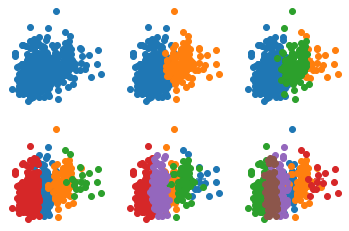

In [4]:
fig, axs = plt.subplots(2, 3)
axs = axs.flat

results = [k_means(k, dataset) for k in range(1, 8)]
for (mu, clusters), ax in zip(results, axs):
    plot_clusters(mu, clusters, ax)
plt.show()

## Plot the distortion of values of k

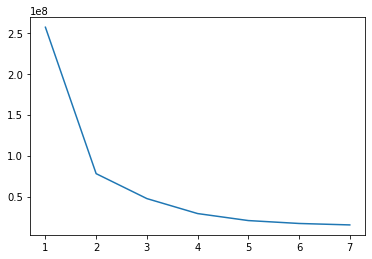

In [5]:
def J(mu, clusters):
    """Distortion function of the clustering that should provide a method of determining quality of fit.
    Sum of the squared distances between all points and their centeroids."""
    return sum(sum(distance_sq(centroid, point) for point in cluster) for centroid, cluster in zip(mu, clusters))

distortions = [J(mu, clusters) for mu, clusters in results]
plt.plot(range(1, 8), distortions)
plt.show()

## Pick a value of k
I would pick k=2 as it seems to be an inflection point in the distortion values. Further increases likely just overfit the data.

# Problem 2: Lack of optimality

## 1. Example of non-optimal clustering
In the example below the clustering result is not a global minimum of the distortion function. There are two clusters but both are labled as one cluster.

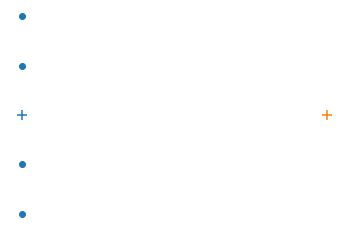

In [6]:
data = np.array([[0, 0], [0, 1],
                 [0, 3], [0, 4]])

k = np.array([[1, 2], [2, 2]])
mu, clusters = k_means(k, data)
plot_clusters(mu, clusters, plt)
plt.show()